<img src="assets/ebay.png" width="350" style="margin-left:auto; margin-right:auto" />

<h1><center>Project: Used Car Listings on eBay Kleinanzeigen</center></h1>

In this project we will analyze a [dataset](https://app.dataquest.io/c/54/m/294/guided-project%3A-exploring-ebay-car-sales-data/1/introduction?path=2&slug=data-scientist&version=2.3) comprising used cars sourced from eBay Kleinanzeigen, which is a classifieds segment on the German eBay website. On this platform, individuals buy, sell and trade a range of goods, including used cars. This section is specifically aimed at local communities and offers a diverse selection of used vehicles, from budget options to high-end models. Users can navigate an extensive selection, engage directly with sellers to negotiate offers, explore vehicle histories, and obtain important details to make informed purchasing decisions.

The dataset was initially gathered through web scraping and subsequently made available on Kaggle. The current dataset utilized in this analysis consists of 50,000 data points, curated by Dataquest. This version was prepared to simulate a less-refined representation of the data. The principal objective of this project revolves around data cleansing and the analyzation of the included used car listings.

The accompanying data dictionary outlining the dataset's attributes is provided below:

- `dateCrawled`: When this ad was first crawled. All field-values are taken from this date.
- `name`: Name of the car.
- `seller`: Whether the seller is private or a dealer.
- `offerType`: The type of listing
- `price`: The price on the ad to sell the car.
- `abtest`: Whether the listing is included in an A/B test.
- `vehicleType`: The vehicle Type.
- `yearOfRegistration`: The year in which the car was first registered.
- `gearbox`: The transmission type.
- `powerPS`: The power of the car in PS.
- `model`: The car model name.
- `kilometer`: How many kilometers the car has driven.
- `monthOfRegistration`: The month in which which year the car was first registered.
- `fuelType`: What type of fuel the car uses.
- `brand`: The brand of the car.
- `notRepairedDamage`: If the car has a damage which is not yet repaired.
- `dateCreated`: The date on which the eBay listing was created.
- `nrOfPictures`: The number of pictures in the ad.
- `postalCode`: The postal code for the location of the vehicle.
- `lastSeenOnline`: When the crawler saw this ad last online.
  
Lets start

*This project was completed as part of the Data Science Career Path offered by dataquest.io.*

#### The Data

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')

autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


We created a dataframe named 'autos' with the csv file 'autos.csv'. There are 15 string columns and 5 int columns in this dataframe. Furthermore, there is a total of 20 columns with ~50000 rows. Some columns have null values, but none have more than ~20% null values. The column names use camelcase instead of Python's preferred snakecase, which means we can't just replace spaces with underscores.

We'll first clean the column names to make the data easier to work with.

#### Clean Columns

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

In [6]:
autos.columns = columns

In the code above, we first looked at the columns names, then saved the columns to the variable columns and did some changes to the names. From camelcase to snakecase. Finally we reassigned the new column names to the dataframe.ns.

#### Data Exploration and Cleansing

We will start by conducting an exploratory analysis of the data to identify evident areas which require data cleansing.


In [7]:
autos.describe(include='all') #show count, unique, top, freq, etc. of every column

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [8]:
print(autos['seller'].value_counts())
print('\n')
print(autos['offer_type'].value_counts())

seller
privat        49999
gewerblich        1
Name: count, dtype: int64


offer_type
Angebot    49999
Gesuch         1
Name: count, dtype: int64


Our initial observations reveal following aspects:

Regarding the text columns, we observe, that all (or nearly all) of the values from the following columns are the same

- `'seller'`
- `'offer_type'`

We'll drop these columns due to there inbalance distribution.

In [9]:
autos = autos.drop(["seller", "offer_type"], axis=1)

In [10]:
print(autos['abtest'].value_counts())
print('\n')
print(autos['gearbox'].value_counts())

abtest
test       25756
control    24244
Name: count, dtype: int64


gearbox
manuell      36993
automatik    10327
Name: count, dtype: int64


Above we used the `.describe(include='all')` method to show all the information about our columns. We then dived deeper into some columns, e.g. `'seller'` and `'offer_Type'` which are incredible inbalanced and therefore should be exluded from further analysis. Therefore we did drop these two columns. Other columns, like `'gearbox'` and `'abtest'` are also bivariate format, but with sensible distribution. 


In [11]:
print(autos['price'].dtypes)
print(autos['odometer'].dtypes)

object
object


In [12]:
autos['odometer'].unique()

array(['150,000km', '70,000km', '50,000km', '80,000km', '10,000km',
       '30,000km', '125,000km', '90,000km', '20,000km', '60,000km',
       '5,000km', '100,000km', '40,000km'], dtype=object)

As seen in the describe table above, the `'price'` and `'odometer'` columns look suspicious. While looking into it, The type seems to be `'object'` and not `'integer'`. The two columns contain numerical data with extra characters being stored as text. Our next step involves cleansing and converting these columns accordingly. 

In [13]:
#transform odometer column to int and remove 'km' or ',' 
autos['odometer'] = autos['odometer'].str.replace('km', '').str.replace(',', '').astype(int) 

#rename the odometer column
autos.rename({'odometer' : 'odometer_km'}, axis=1, inplace=True)

autos['odometer_km'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int32

In [14]:
#transform price column to int and remove '$' or ',' 
autos['price'] = autos['price'].str.replace('$', '').str.replace(',', '').astype(int)

autos['price'].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int32

#### Diving Deeper Into Odometer and Price Column

Now we will explore more of the odometer_km and price columns and look for values that seem to be unrealistic.

In [15]:
autos['odometer_km'].value_counts().sort_index(ascending=False)

odometer_km
150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
40000       819
30000       789
20000       784
10000       264
5000        967
Name: count, dtype: int64

The observations signify that the entries in this field include rounded values, implying that sellers likely selected from predetermined options for this particular attribute. Furthermore, there is a dominance of high kilometers vehicles compared to those with low kilometers.




In [16]:
print(autos["price"].describe())
print(autos["price"].unique().shape)
autos["price"].value_counts().head(15)

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64
(2357,)


price
0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
Name: count, dtype: int64

As with the `'odometer'`, the `'prices'` appear to be rounded. However, considering the presence of 2357 different values in this column, this doesnt seem to be the right conclusion. Hence it might be possible, that sellers in general tend to round the values for the offer.

There are 1421 listings marked with a price of $0, which represents 2% of all cars. One consideration might be to remove these specific lines. Furthermore, the stated maximum price reaches an extraordinary sum of one hundred million dollars, prompting a closer look at the highest-priced entries.

In [17]:
autos["price"].value_counts().sort_index(ascending=False).head(15)

price
99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
Name: count, dtype: int64

In the preceding cells, adjustments were made to the dataset, primarily focusing on the `'odometer_km'` and `'price'` columns. While the `'odometer_km'` column doesn't have any outliers, the `'price'` column does. Consequently, in the subsequent step below, values exceeding 150,000 will be omitted.This value appears to be a reasonable threshold for the maximum price. Notably, values such as $0 were not excluded, considering the possibility that sellers might offer the car for free, considering the vehicle's condition.

In [18]:
autos = autos[autos["price"].between(1,151000)]
autos["price"].describe()

count     48545.000000
mean       5800.920321
std        7858.229641
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7450.000000
max      145000.000000
Name: price, dtype: float64

#### The Date Columns

Several columns within the dataset encompass date-related information:

- `'date_crawled'`
- `'registration_month'`
- `'registration_year'`
- `'ad_created'`
- `'last_seen'`

These columns are made up of data that was crawled and data that contains meta information from the crawler. The non-registration data is stored as character strings.

Lets dive deeper into these columns and learn something about the data 

In [19]:
autos[['date_crawled', 'ad_created', 'last_seen']][:5] #look at the frist five rows from the specific columns

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


We'll now look into the `'date_crawled'` column, we'll extract the date with `.str[:10]` and count the values. The output for every counted date will be in percentage due to `normalize=True`. We do not exclude the missing values, we then rank the values by date with `sort_index()` and by values with `sort_values()`.

##### Date Crawled

In [20]:
#show the date plus value_counts per date, sorted by index value
autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=True) 

date_crawled
2016-03-05    0.025296
2016-03-06    0.014049
2016-03-07    0.036028
2016-03-08    0.033289
2016-03-09    0.033103
2016-03-10    0.032197
2016-03-11    0.032588
2016-03-12    0.036935
2016-03-13    0.015676
2016-03-14    0.036564
2016-03-15    0.034298
2016-03-16    0.029601
2016-03-17    0.031620
2016-03-18    0.012895
2016-03-19    0.034792
2016-03-20    0.037882
2016-03-21    0.037367
2016-03-22    0.032959
2016-03-23    0.032218
2016-03-24    0.029334
2016-03-25    0.031620
2016-03-26    0.032218
2016-03-27    0.031064
2016-03-28    0.034834
2016-03-29    0.034113
2016-03-30    0.033659
2016-03-31    0.031847
2016-04-01    0.033701
2016-04-02    0.035493
2016-04-03    0.038603
2016-04-04    0.036502
2016-04-05    0.013081
2016-04-06    0.003172
2016-04-07    0.001401
Name: proportion, dtype: float64

In [21]:
#show the date plus value_counts per date, sorted by values ascending
autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_values()

date_crawled
2016-04-07    0.001401
2016-04-06    0.003172
2016-03-18    0.012895
2016-04-05    0.013081
2016-03-06    0.014049
2016-03-13    0.015676
2016-03-05    0.025296
2016-03-24    0.029334
2016-03-16    0.029601
2016-03-27    0.031064
2016-03-25    0.031620
2016-03-17    0.031620
2016-03-31    0.031847
2016-03-10    0.032197
2016-03-23    0.032218
2016-03-26    0.032218
2016-03-11    0.032588
2016-03-22    0.032959
2016-03-09    0.033103
2016-03-08    0.033289
2016-03-30    0.033659
2016-04-01    0.033701
2016-03-29    0.034113
2016-03-15    0.034298
2016-03-19    0.034792
2016-03-28    0.034834
2016-04-02    0.035493
2016-03-07    0.036028
2016-04-04    0.036502
2016-03-14    0.036564
2016-03-12    0.036935
2016-03-21    0.037367
2016-03-20    0.037882
2016-04-03    0.038603
Name: proportion, dtype: float64

The website seems to be got crawled daily for an approximate duration of one month spanning March and April 2016. As you can see below, the distribution of crawled listings across each day exhibits an approximately uniform pattern.

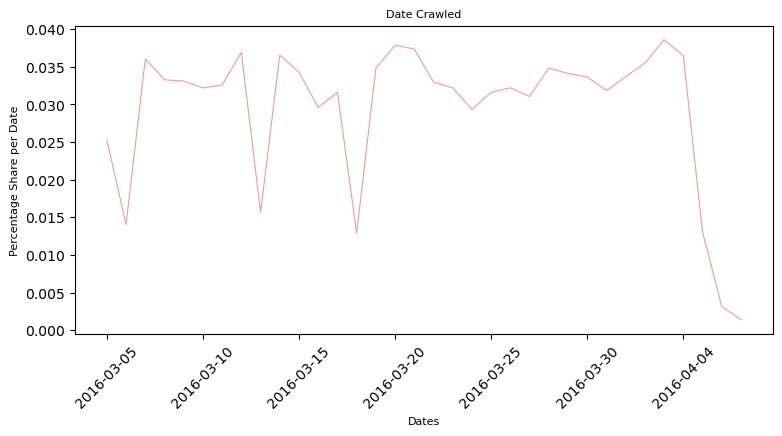

In [22]:
plt.figure(figsize=(9, 4))
autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index().plot(kind='line', rot=45, 
                                                                                            linewidth=0.8, color='lightcoral', alpha=0.8)
plt.xlabel('Dates', size=8)
plt.ylabel('Percentage Share per Date', size=8)
plt.title('Date Crawled', size=8)
plt.show()

##### Ad Created

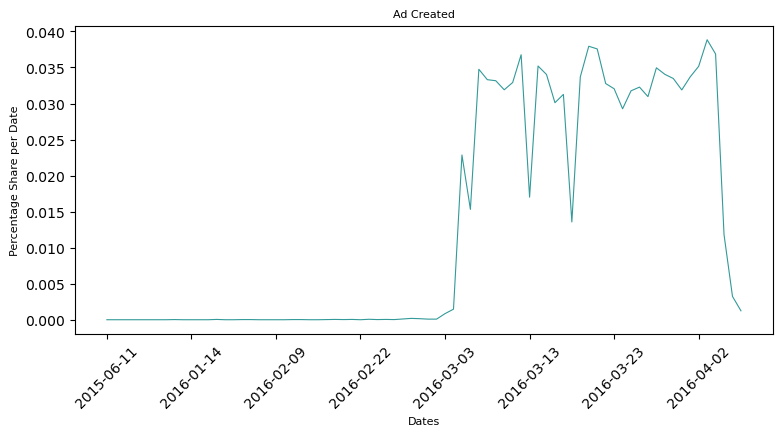

In [23]:
plt.figure(figsize=(9, 4))
autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=True).plot(kind='line', rot=45, 
                                                                                                        linewidth=0.8, color='teal', alpha=0.8)
plt.xlabel('Dates', size=8)
plt.ylabel('Percentage Share per Date', size=8)
plt.title('Ad Created', size=8)
plt.show()

The range of ad created dates is quite various. While few of the created ads are quite old (with the oldest at around 9 months.), most of the ads fall within 1-2 months of the listing date. The maximum value is 0.0389. Hence 3.89% of the ads were created on 3th April of 2016.

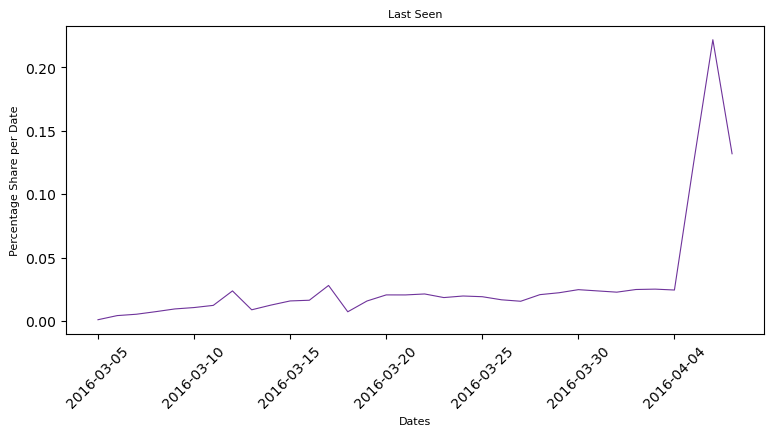

In [24]:
plt.figure(figsize=(9, 4))
autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=True).plot(kind='line', rot=45, 
                                                                                                        linewidth=0.8, color='indigo', alpha=0.8)
plt.xlabel('Dates', size=8)
plt.xlabel('Dates', size=8)
plt.ylabel('Percentage Share per Date', size=8)
plt.title('Last Seen', size=8)
plt.show()

Since the crawler recorded the date it last saw any listing, it allows us to determine on what day a listing was removed, presumably signifying the sale of the respective car.

In the concluding three days the count of `last_seen` values increased disproportionately. Given that this figure is 6 to 10 times greater than the counts observed on preceding days, it is improbable that such a surge corresponds to a increase in car sales. It is more plausible that these elevated values are associated with the end of the crawling process. Hence these values are not indicative of actual car sales.

Next we will look deeper into the colum 'registration_year'.

#### Addressing Inaccuracies in Registration Year Data





In [25]:
autos['registration_year'].describe()

count    48545.000000
mean      2004.753445
std         88.661893
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

The `registration_year` values have strange characteristics. The mean is given as 2005, with a remarkably high standard deviation of 105, suggesting the existence of data associated with 1900.

The range of `registration_year` spans from the minimum value of year 1000 (long before cars were invented) to the maximum value of year 9999 (long in the future). Taking into account the logical limitation that a car can't be first registered before the listing was seen, any car with a registration year after 2016 is inaccurate. Consequently, values above 2016 are excluded. 

Determining the earliest valid year is challenging. Practically, the range extends to the initial decades of the 1900s. One option is to remove the listings with these values. Let's answer the question: What percentage of our data in this column is invalid?

In [26]:
# Show percentage of values with registration_year between 1900 and 2016
autos['registration_year'].between(1900, 2016).value_counts(normalize=True)

registration_year
True     0.961191
False    0.038809
Name: proportion, dtype: float64

Roughly 96% of the cars are registered between 1900 - 2016. If we go further with the analysis, we would exclude about 4% of oberservations. Lets examine, how many values are above 2016.

In [27]:
# Show percentage of values with registration_year between 2017 and 2023
autos['registration_year'].between(2017,2023).value_counts(normalize=True)

registration_year
False    0.961603
True     0.038397
Name: proportion, dtype: float64

In [28]:
# Exclude all values not between 1900 - 2016
autos = autos[autos["registration_year"].between(1900,2016)]

In [29]:
# Examine the percentage distribution of registration year, show just first 10 values.
autos['registration_year'].value_counts(normalize=True).head(10)

registration_year
2000    0.067615
2005    0.062922
1999    0.062086
2004    0.057928
2003    0.057843
2006    0.057221
2001    0.056471
2002    0.053278
1998    0.050620
2007    0.048777
Name: proportion, dtype: float64

As showen above, nearly all values are related to dates, which are above 2016. Dates beyond 2016 are inaccurate. Hence we can exclude these values a keep the range 1900 - 2016. Next we'll explore the price by brand.

#### Price by Brand

In [30]:
# Show the brands listed
autos['brand'].unique()

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'sonstige_autos',
       'opel', 'mazda', 'porsche', 'mini', 'toyota', 'dacia', 'nissan',
       'jeep', 'saab', 'volvo', 'mitsubishi', 'jaguar', 'fiat', 'skoda',
       'subaru', 'kia', 'citroen', 'chevrolet', 'hyundai', 'honda',
       'daewoo', 'suzuki', 'trabant', 'land_rover', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

In [31]:
# Show the distribution by brand
autos['brand'].value_counts(normalize=True,).sort_values(ascending=False)

brand
volkswagen        0.211354
bmw               0.110028
opel              0.107627
mercedes_benz     0.096462
audi              0.086582
ford              0.069930
renault           0.047170
peugeot           0.029854
fiat              0.025653
seat              0.018281
skoda             0.016416
nissan            0.015280
mazda             0.015195
smart             0.014166
citroen           0.014016
toyota            0.012709
hyundai           0.010030
sonstige_autos    0.009773
volvo             0.009151
mini              0.008765
mitsubishi        0.008230
honda             0.007844
kia               0.007072
alfa_romeo        0.006644
suzuki            0.005936
porsche           0.005872
chevrolet         0.005701
chrysler          0.003515
dacia             0.002636
daihatsu          0.002507
jeep              0.002272
subaru            0.002143
land_rover        0.002100
saab              0.001650
jaguar            0.001564
daewoo            0.001500
trabant           0.00

The german manufactures dominate the upper section of the rankings, collectively constituting nearly 50% of the comprehensive listings (Volkswagen ~21.4%, Mercedes-Benz ~9.4%, Audi ~ 8.5% and BMW ~10.8%). Just Porsche ist quite weak with ~0.5%, but that's probably because porsche is a very expensive premium brand and there aren't that many offers for these car.

Volkswagen stands out prominently as the preeminent brand. With about double the cars for sale of the next two brands combined. In contrast, numerous brands hold a less substantial share of the overall listings. Consequently, our analytical focus will be restricted to brands that account for more than 5% of the total listings.

In [32]:
# Filter the brands by value_counts
brand_counts = autos["brand"].value_counts(normalize=True)
valuable_brands = brand_counts[brand_counts > .05].index

print(valuable_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object', name='brand')


In [33]:
mean_prices = {}

for brands in valuable_brands:
    brand = autos[autos["brand"] == brands]
    price_mean = brand["price"].mean()
    mean_prices[brands] = int(price_mean)

In [34]:
mean_prices_sort = pd.Series(mean_prices).sort_values(ascending=False)
mean_prices_df = pd.DataFrame(mean_prices_sort, columns=['mean_price'])

Above, we computed the mean price for each brand, revealing a notable price disparity among the top brands. Upon scrutinizing the data, Mercedes-Benz, Audi, and BMW emerge as brands exhibiting the highest mean prices, while Opel and Ford showcase the lowest mean prices. Volkswagen, in contrast, maintains an intermediate mean price, a characteristic that may contribute to its popularity.ion.

In [35]:
mean_kilometer = {}

for brands in valuable_brands:
    brand = autos[autos["brand"] == brands]
    kilometer_mean = brand["odometer_km"].mean()
    mean_kilometer[brands] = int(kilometer_mean)
    
mean_kilometer_sort = pd.Series(mean_kilometer).sort_values(ascending=False)
mean_price_kilometer = pd.DataFrame(mean_kilometer_sort, columns=['mean_kilometer'])
mean_price_kilometer['mean_price'] = mean_prices_df
mean_price_kilometer

,mean_kilometer,mean_price
bmw,132633,8201
mercedes_benz,130826,8554
opel,129310,2975
audi,129188,9295
volkswagen,128707,5402
ford,124266,3749


In the above section we have expanded the analysis and also listed the average kilometers driven per brand. As you can see in the graph above, most of the brands have a average kilometer count from about 125000km - 130000km. The variation in kilometers among the top brands exhibits less disparity compared to the variation observed in prices. Specifically, all kilometers fall within a 10% range for the leading brands. 

Additionally, we can observe a trend. Wherein more expensive vehicles tend to feature higher kilometer, the less expensive counterparts tend to exhibit lower kilometers.

#### The Most Common Brand-Model Combinations

Next we are going to look into the most common brand-model combinations. Below we used the `.groupby()` operation, to complete these task.

In [36]:
grouped = autos.groupby(['brand', 'model'])

# Show the 10 most common brand-model combinations
print(grouped.size().sort_values(ascending=False).head(10))

brand          model   
volkswagen     golf        3707
bmw            3er         2615
volkswagen     polo        1609
opel           corsa       1592
volkswagen     passat      1349
opel           astra       1348
audi           a4          1231
mercedes_benz  c_klasse    1136
bmw            5er         1132
mercedes_benz  e_klasse     958
dtype: int64


Based on this dataset, the most renowned brand-model pairing is represented by the Volkswagen Golf. Broadly speaking, Volkswagen boasts three distinct models within the top 10 listings. In comparison, BMW, Mercedes-Benz, and Opel each feature two models among the top 10, whereas Audi is represented by a singular model, namely the Audi A4.

#### Cars with and without damage

In [37]:
# 33815 cars without damage, 4540 cars with damage
autos['unrepaired_damage'].value_counts()

unrepaired_damage
nein    33815
ja       4540
Name: count, dtype: int64

We shall partition the `autos` dataset into two discrete subsets: one comprising vehicles with reported damage and another encompassing vehicles lacking any information regarding damage.

In [38]:
damage = autos[autos['unrepaired_damage'] == 'ja']
no_damage = autos[autos['unrepaired_damage'] == 'nein']

Ultimately, we will compute the mean price for the two distinct categories and consolidate the results into a unified dataframe. As anticipated, vehicles with indications of damage manifest a markedly lower mean price when contrasted with those without such indications. Cars lacking damage exhibit an average price that is more than three times higher than their damaged counterparts.


In [39]:
dmg_series = pd.Series([round(damage['price'].mean(),), round(no_damage['price'].mean(),)], index=['damage', 'no_damage'])
damage_df = pd.DataFrame(dmg_series, columns=['mean_price'])
damage_df

,mean_price
damage,2241
no_damage,7046


#### Conclusion

The primary aim of this project encompassed data cleaning and analysis of the provided used car listings. Following the completion of the data cleansing process, we processed the data and subsequently undertook a comprehensive dataset analysis. Based on the processed dataset, we identified the prominent brands, with four out of the six prominent brands originating from German manufacturers, and `Volkswagen` emerging as the most prevalent brand in the dataset. In terms of mean price, `Audi` exhibited the highest mean price value, while `Opel` demonstrated the lowest mean price value.

Upon delving into brand-model combinations, it is discerned that the most prevalent model is the `VW Golf`, followed by the `BMW 3 Series`. Other models such as the `VW Polo`, `Opel Corsa`, and `VW Passat`, while less frequent, still maintain a presence within the top 10.

Conclusively, an examination was conducted to compare the prices of listed cars with and without damage. Unsurprisingly, the findings indicated that cars without damage possessed higher market value. Due to our analysis within the scope of this dataset revealed that, on average, cars without damage are priced at over three times the value of their damaged counterparts.